# Regression Analysis of Hydrogenated Nanoporous Silicon Carbide Models

This is data that I compiled myself while I was doing research for Dr. Blair Tuttle at Penn State Behrend and while I was in a Research Experience for Undergraduates (REU) program under Dr. Sokrates Pantelides at Vanderbilt University.

Each row in the read-in Excel sheet represents one theoretical model of silicon carbide that has been altered to be nanoporous, with any dangling bonds being satisfied by placing a hydrogen atom at that location. Each model was relaxed with Density Functional theory (DFT) using the Vienna Ab initio Simulation Package (VASP) with a plane wave cutoff of 400 eV. This is esentially a way to solve the Schrödinger equation numerically. By solving the Schrödinger equation, we gain all sorts of insights about the electronic properties of compounds--in this case hydrogenated nanoporous silicon carbide. This data was either extracted or derived from the output of the VASP program.

#### Variables Explanation

- **Name**: name given to the compound. The numbers at the end represent the number of hydrogen atoms present in the model
- **Band Gap**: The band gap of the compound - this is the feature we are trying to get a working model for
- **n*SiC**: a derived variable that represents how many Si-C bonds were removed to make the model
- **n_CH**: represents how many C-H bonds were added to make the model
- **n_SiH**: represents how many Si-H bonds were added to make the model
- **n_SiSi**: represents how many Si-Si bonds were added to make the model
- **n_CC**: represents how many C-C bonds were added to make the model
- **______ density**: represents the bond density of the given bond
- **Mean, MAD, STD**: The mean, mean average deviation, and standard deviation of the given bond types
- **Percent__**: percent of the given atom in the compound
- **Density**: density, need I say more?
- **Volume**: volume of the theoretical compound
- **Free Energy**: free energy of the compound
- **__C or __Si**: number of Carbon or Silicon clusters of size __ found in the model. These are the number of Carbon or Silicon atoms that are all connected together in the structure.

In [24]:
import numpy as np
import pandas as pd
import string

In [25]:
df = pd.read_excel('data.xlsx')
df.head()
df.columns

Index(['Name', ' Band Gap (eV)', ' n*_SiC', ' n_CH', ' n_SiH', ' n_SiSi',
       ' n_CC', ' SiC density', ' CH density', ' SiH density', ' SiSi density',
       ' CC density', ' HH density', ' Mean SiSi Length', ' MAD SiSi',
       ' STD SiSi', ' Mean CC Length', ' MAD CC', ' STD CC',
       ' Mean SiC Length', ' MAD SiC', ' STD SiC', ' PercentC', ' PercentSi',
       ' PercentH', ' Density(g/cm^3)', ' Volume(cm^3)', ' Free Energy', ' 1C',
       ' 2C', ' 3C', ' 4C', ' 5C', ' 6C', ' 7C', ' 8C', ' 9C', ' 10C', ' 11C',
       ' 1Si', ' 2Si', ' 3Si', ' 4Si', ' 5Si', ' 6Si', ' 7Si', ' 8Si', ' 9Si',
       ' 10Si', ' 11Si'],
      dtype='object')

In [26]:
df[[' Band Gap (eV)', ' n*_SiC', ' n_CH', ' n_SiH', ' n_SiSi',
       ' n_CC', ' SiC density', ' CH density', ' SiH density', ' SiSi density',
       ' CC density', ' HH density', ' Mean SiSi Length', ' MAD SiSi',
       ' STD SiSi', ' Mean CC Length', ' MAD CC', ' STD CC',
       ' Mean SiC Length', ' MAD SiC', ' STD SiC', ' PercentC', ' PercentSi',
       ' PercentH', ' Density(g/cm^3)', ' Volume(cm^3)', ' Free Energy', ' 1C',
       ' 2C', ' 3C', ' 4C', ' 5C', ' 6C', ' 7C', ' 8C', ' 9C', ' 10C', ' 11C',
       ' 1Si', ' 2Si', ' 3Si', ' 4Si', ' 5Si', ' 6Si', ' 7Si', ' 8Si', ' 9Si',
       ' 10Si', ' 11Si']] = df[[' Band Gap (eV)', ' n*_SiC', ' n_CH', ' n_SiH', ' n_SiSi',
       ' n_CC', ' SiC density', ' CH density', ' SiH density', ' SiSi density',
       ' CC density', ' HH density', ' Mean SiSi Length', ' MAD SiSi',
       ' STD SiSi', ' Mean CC Length', ' MAD CC', ' STD CC',
       ' Mean SiC Length', ' MAD SiC', ' STD SiC', ' PercentC', ' PercentSi',
       ' PercentH', ' Density(g/cm^3)', ' Volume(cm^3)', ' Free Energy', ' 1C',
       ' 2C', ' 3C', ' 4C', ' 5C', ' 6C', ' 7C', ' 8C', ' 9C', ' 10C', ' 11C',
       ' 1Si', ' 2Si', ' 3Si', ' 4Si', ' 5Si', ' 6Si', ' 7Si', ' 8Si', ' 9Si',
       ' 10Si', ' 11Si']].apply(pd.to_numeric)

In [27]:
df_linear_regression = df[[' Band Gap (eV)', ' n*_SiC', ' n_CH', ' n_SiH', ' n_SiSi', ' n_CC']]

In [28]:
df_linear_regression.head()

,Band Gap (eV),n*_SiC,n_CH,n_SiH,n_SiSi,n_CC
0,1.34551,6.730000e-07,0.000000,0.0,0.0,0.0
1,1.39846,9.259930e-03,0.009259,0.0,0.0,0.0
2,1.49872,3.703770e-02,0.027778,0.0,0.0,0.0
3,1.65507,7.407470e-02,0.055556,0.0,0.0,0.0
4,1.63003,9.259320e-02,0.064815,0.0,0.0,0.0


In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_linear_regression, test_size=0.2, random_state = 42)
train_x = train[[' n*_SiC', ' n_CH', ' n_SiH', ' n_SiSi', ' n_CC']]
train_y = train[' Band Gap (eV)']
test_x = test[[' n*_SiC', ' n_CH', ' n_SiH', ' n_SiSi', ' n_CC']]
test_y = test[' Band Gap (eV)']
train_y

69     1.32051
138    2.11921
2      1.49872
93     1.42864
136    2.24220
        ...   
71     1.27574
106    1.29739
14     1.46032
92     1.40752
102    1.59785
Name:  Band Gap (eV), Length: 136, dtype: float64

# Linear Regression

In [30]:
#trying n-nearest neighbors regression from 1 to 8
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

lr = LinearRegression().fit(train_x, train_y)
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [ 3.6657222  -2.33421087 -5.05257224 -8.93304719 -5.04693533]
Intercept: 1.3445698169431122


### $R^2$ Scores Linear Regression

Training set score: 0.6341357289251135
Test set score: 0.630484553928895


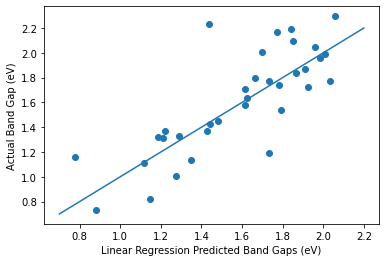

In [31]:
print('Training set score:', lr.score(train_x, train_y))
print('Test set score:', lr.score(test_x, test_y))

plt.scatter(lr.predict(test_x), test_y)
plt.plot([0.7,2.2], [0.7,2.2])
plt.xlabel('Linear Regression Predicted Band Gaps (eV)')
plt.ylabel('Actual Band Gap (eV)')
plt.show()

The $R^2$ scores are not good, but there isn't a large discrepancy between the training set and the test set, meaning we aren't overfitting on the training set too much. Let's try some other types of regression. Physically, this basic linear model makes sense though since the y-intercept is extraordinarily close to the band gap (in eV) of crystalline silicon carbide, which is what we would expect from first-order perturbation theory.

# Ridge Regression

Ridge regression is based on the principle that we want all of our independent variables to have as little affect on the outcome as possible. This means that all of our linear coefficients will be as close to zero as we can possibly make them. I expect this type of model for our problem not to be as physically feasible as the regular linear regression. The y-intercept most likely will be higher than the band gap for crystalline silicon carbide since all of the linear coefficients will be smaller.

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(train_x, train_y)

print('Coefficients:', ridge.coef_)
print('Intercept:', ridge.intercept_)

print('Training set score:', ridge.score(train_x, train_y))
print('Test set score:', ridge.score(test_x, test_y))

Coefficients: [-0.20886134  0.36392665  0.08959599 -1.62205234 -0.15133655]
Intercept: 1.7629110311567195
Training set score: 0.2765939866254259
Test set score: 0.3158668791134096


As predicted, the y-intercept for the ridge regression model is higher than that of the linear regression model. This also does not give us good results, as the $R^2$ values are low for both the training set and the test sets.

### Different values of alpha for ridge regression

With ridge regression, a default alpha value of 1.0 is used. The higher the alpha value, the more restricted the model is, and the closer the coefficients will be to zero. The closer alpha gets to zero, the more ridge regression resembles linear regression, which allows the variables more freedom.

In [33]:
# alpha = 0.1
ridge01 = Ridge(alpha=0.1).fit(train_x, train_y)

print('Coefficients:', ridge01.coef_)
print('Intercept:', ridge01.intercept_)

print('Training set score:', ridge01.score(train_x, train_y))
print('Test set score:', ridge01.score(test_x, test_y))

Coefficients: [ 0.91922108  1.14762323  0.37804698 -4.96442484 -2.17220967]
Intercept: 1.4862874309497776
Training set score: 0.5566615619452626
Test set score: 0.5987169011177145


In [34]:
# alpha = 0.01
ridge001 = Ridge(alpha=0.01).fit(train_x, train_y)

print('Coefficients:', ridge001.coef_)
print('Intercept:', ridge001.intercept_)

print('Training set score:', ridge001.score(train_x, train_y))
print('Test set score:', ridge001.score(test_x, test_y))

Coefficients: [ 2.42009793  0.105312   -1.64942936 -7.53594331 -4.24572572]
Intercept: 1.3181391285889221
Training set score: 0.6264301675443031
Test set score: 0.6457115157561824


So it seems that the best regression of the two types we've tried so far is just plain 'ol linear regression, as predicted earlier.

# Decision Tree Regressor

A decision tree, and maybe even a random forest, might work well on our data if we include all of the data included in our spreadsheet. Let's first try applying it to the values we applied linear and ridge regression to to try to keep the model as simple as possible.

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(train_x, train_y)

print('Training set score:', tree.score(train_x, train_y))
print('Test set score:', tree.score(test_x, test_y))

Training set score: 0.6824828561657154
Test set score: 0.660278693264003


The decision tree performs slightly better than the linear regression model; however, this is a decision tree with a depth of only 3. The depth is how many consecutive questions the tree is trained to ask before it reaches a decision. The greater the depth, the more prone the model is to overfitting, so we have to proceed with caution. Often times, a lower depth will generalize a lot better to the test set. Let's take a look at the effect depth has on the accuracy of our model.

[0. 0. 0. 1. 0.]
[0.        0.        0.        0.7735097 0.2264903]
[0.15448962 0.         0.03369389 0.63058895 0.18122754]
[0.15954066 0.01106547 0.02864983 0.59307152 0.20767252]
[0.16237691 0.06689129 0.03702244 0.55649843 0.17721092]
[0.20411084 0.02294648 0.02870321 0.53039376 0.21384571]
[0.21402754 0.027431   0.02510893 0.52412318 0.20930935]
[0.27248772 0.03018399 0.03160267 0.50412332 0.16160231]
[0.2230169  0.03496259 0.03526569 0.5026011  0.20415372]
[0.21134302 0.076751   0.05084727 0.50356947 0.15748923]


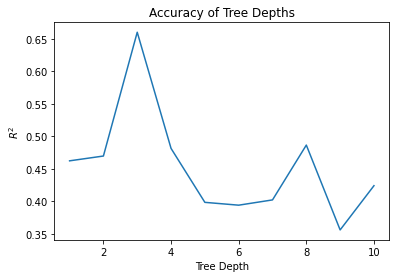

In [36]:
depths = range(1,11) #10 different tree depths
test_accuracy = [] #test set accuracies

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth).fit(train_x, train_y)
    test_accuracy.append(tree.score(test_x, test_y))
    print(tree.feature_importances_)
    
plt.plot(depths, test_accuracy)
plt.xlabel('Tree Depth')
plt.ylabel('$R^2$')
plt.title('Accuracy of Tree Depths')
plt.show()

It looks like our decision tree regressor is most accurate when the tree depth is equal to three. So we made the right arbitrary decision a few cells up. Let's try a decision tree regressor with more of the data we have collected in our Excel file.

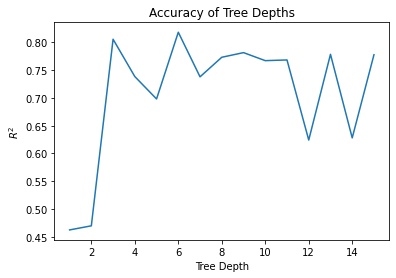

In [70]:
train, test = train_test_split(df, test_size=0.2, random_state = 42)
train_x = train[[' n*_SiC', ' n_CH', ' n_SiH', ' n_SiSi',
       ' n_CC', ' SiC density', ' CH density', ' SiH density', ' SiSi density',
       ' CC density', ' HH density', ' PercentC', ' PercentSi',
       ' PercentH', ' Density(g/cm^3)', ' Volume(cm^3)', ' Free Energy']]
train_y = train[' Band Gap (eV)']
test_x = test[[' n*_SiC', ' n_CH', ' n_SiH', ' n_SiSi',
       ' n_CC', ' SiC density', ' CH density', ' SiH density', ' SiSi density',
       ' CC density', ' HH density', ' PercentC', ' PercentSi',
       ' PercentH', ' Density(g/cm^3)', ' Volume(cm^3)', ' Free Energy']]
test_y = test[' Band Gap (eV)']

depths = range(1,16) #10 different tree depths
test_accuracy = [] #test set accuracies

for depth in depths:
    tree = DecisionTreeRegressor(max_depth=depth).fit(train_x, train_y)
    test_accuracy.append(tree.score(test_x, test_y))
    
plt.plot(depths, test_accuracy)
plt.xlabel('Tree Depth')
plt.ylabel('$R^2$')
plt.title('Accuracy of Tree Depths')
plt.show()

It looks like the sweet spot for our tree depth would be anywhere between 5 and 9. Anything lower than that and our scores aren't too high. Anything more would be unpredictable.

Let's take a look at the feature importances to see if there is anything we can afford to leave out of the model without sacrificing accuracy on the test set.

In [85]:
tree = DecisionTreeRegressor(max_depth=6).fit(train_x, train_y)
print(tree.feature_importances_)

[5.34776034e-02 8.01765067e-03 1.99253821e-04 4.66624815e-01
 0.00000000e+00 3.42614515e-03 1.36570863e-02 4.23989700e-02
 1.71460937e-03 1.59712575e-01 0.00000000e+00 2.51316398e-02
 1.30753535e-01 1.72804362e-02 5.10771190e-02 0.00000000e+00
 2.65285612e-02]


After running the above cell multiple times, one feature that always has low importance is the volume. We can afford to remove this without affecting the accuracy of the decision tree. We can plot the feature importances of each of the features for comparison.

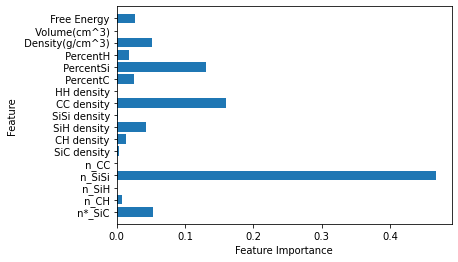

In [86]:
def plot_feature_importances(model):
    n_features = train_x.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), [' n*_SiC', ' n_CH', ' n_SiH', ' n_SiSi',
       ' n_CC', ' SiC density', ' CH density', ' SiH density', ' SiSi density',
       ' CC density', ' HH density', ' PercentC', ' PercentSi',
       ' PercentH', ' Density(g/cm^3)', ' Volume(cm^3)', ' Free Energy'])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.ylim(-1, n_features)
    plt.show()

plot_feature_importances(tree)

We can see in the above plot that Volume has no importance in the model as well as a few other features. Now, just because a feature was not picked does not mean that it isn't an important feature as far as data goes. It just means that the decision tree decided not to use it, maybe because it contains the same information as another feature. When building a decision tree it is very possible to get a drastically different tree each time you train a model. To counteract this, we can try building a random forest, which is an ensemble on many different decision trees trained on the same dataset. With a random forest, we can negate any bias introduced in any singular tree.

# Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=15).fit(train_x, train_y)
print(forest.score(test_x, test_y))

0.7918322139531084


Above was a random forest initiated with 15 different decision trees. Similar to what we did with decision trees, let's see if we can optimize the number of trees to put in the forest.

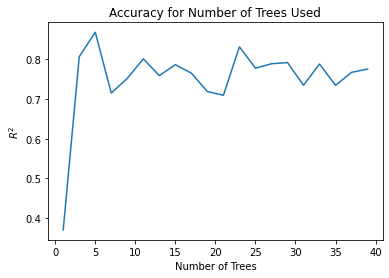

In [98]:
trees = range(1, 40, 2)
r_squared = []
for tree in trees:
    forest = RandomForestRegressor(n_estimators=tree, max_depth=7).fit(train_x, train_y)
    r_squared.append(forest.score(test_x, test_y))

plt.plot(trees, r_squared)
plt.xlabel('Number of Trees')
plt.ylabel('$R^2$')
plt.title('Accuracy for Number of Trees Used')
plt.show()

Okay, so it looks like we reach the optimal number of trees once we reach around 5 or 6 of them at a tree depth of 7. Another thing to note in this graph is that the random forest barely outperforms the decision trees, if at all. Thus when predicting the band gaps of silicon carbide based on the features used in these models so far, it might be best to stick with a simple decision tree, for more simplicity.